### Imports

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

### Implementación de ANOVA de dos factores
#### Caso donde se estudia la interacción entre dos niveles de temperatura y dos niveles de disolución.

1. En primer lugar se debe hacer un dataframe, o sea, importar los datos de la tabla de excel, en formato csv, preferiblemente. (también se acepta txt)
2. Luego pasar un print statement del dataframe para cerciorarse que se importaron los datos correctamente.

In [2]:
df = pd.read_csv("anova.csv")
print(df)

"""Note que la columna izquierda se agregó automáticamente e indica el orden de las filas, y cada columna se encuentra separada por un espacio en blanco."""


    Temperatura     NaCl  Fosfato
0            25  138.400  120.180
1            25  130.890  129.430
2            25   94.646  139.760
3            25   96.653  132.750
4            25  116.900  137.230
5            25   88.215  121.730
6            37   92.312  123.500
7            37  147.280  128.940
8            37  116.480  102.860
9            37   88.802   99.941
10           37  114.370  161.680
11           37   90.737  136.440


'Note que la columna izquierda se agregó automáticamente e indica el orden de las filas, y cada columna se encuentra separada por un espacio en blanco.'

### Interacciones
Ahora para determinar si realmente existen interacciones entre los factores se hace un gráfico de interacciones. Si se intersecan al menos una vez existen indicios de que sí hay.

Se hace con el código de abajo. Primero se ingresa el parámetro que se quiere en el eje x, luego el parámetro que tiene dos niveles, por último el parámetro que va en el eje y

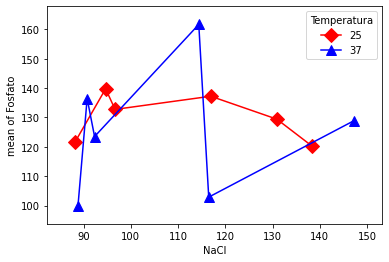

In [3]:
fig = interaction_plot(df.NaCl, df.Temperatura, df.Fosfato,
             colors=['red','blue'], markers=['D','^'], ms=10)

### Variables para el ANOVA

In [4]:
# ANOVA
mod = ols('Temperatura~NaCl+Fosfato+NaCl*Fosfato', data=df).fit()
anova = sm.stats.anova_lm(mod, type=2)
print(anova)

"""df equivale a los grados de libertad; sum_sq es suma de cuadrados; mean_sq es el promedio de cuadrados; F es el valor F y PR es el p-value"""

               df      sum_sq    mean_sq         F    PR(>F)
NaCl          1.0    1.869027   1.869027  0.038318  0.849687
Fosfato       1.0    8.652937   8.652937  0.177398  0.684707
NaCl:Fosfato  1.0   31.262869  31.262869  0.640936  0.446494
Residual      8.0  390.215168  48.776896       NaN       NaN


'df equivale a los grados de libertad; sum_sq es suma de cuadrados; mean_sq es el promedio de cuadrados; F es el valor F y PR es el p-value'